###### To solve a puzzle, you are given an initial state and a goal state.
###### Target is to reach goal state from initial state using puzzle rules.
######  We can move blank tile only on left, right, up, and down
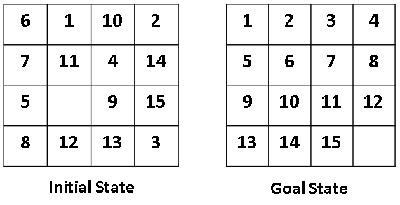

# Generate an intial state of NPuzzle

In [3]:
import numpy as np
import random
import math

In [4]:
def get_state():
    n = random.choice([3,4,5,6])
    state = list(range(n**2))
    random.shuffle(state)
    print(np.array(state).reshape(n,n))
    return state
st = get_state()
print(st)

[[4 8 1]
 [2 3 6]
 [7 5 0]]
[4, 8, 1, 2, 3, 6, 7, 5, 0]


In [5]:
def get_dim(state):
  return int(math.sqrt(len(state)))

get_dim(st)

3

# Calculate inversion

Inversion is a pair of tiles that are in the reverse order from where they ought to be. In our case, the bigger number is in front of the smaller one.



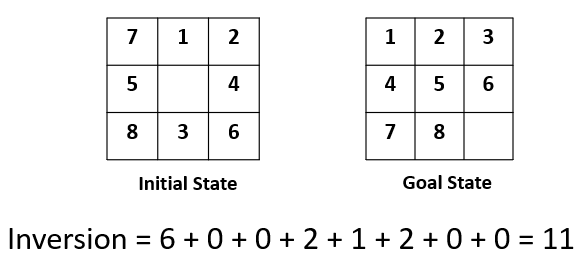

In [6]:
def get_invCount(state):
    count = 0
    for i in range(len(state)):
        for j in range(i+1,len(state)):
            if state[j]!=0 and state[i] > state[j]:
              count += 1
    return count

get_invCount(st)

11

In [7]:
st.index(0)

8

# **Find blank row**

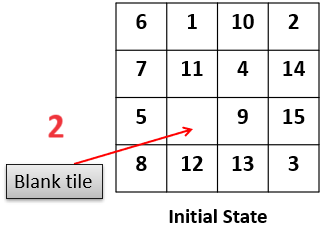

In [27]:
def get_blank_row(state):
    # Iterate through each row and column to find the blank tile (0 or None, if applicable)
    for row_index, row in enumerate(state):
        if 0 in row:  # Assuming the blank tile is represented by 0
            return row_index + 1  # Return 1-based row index
    return -1  # Return -1 if blank tile not found


In [30]:
initial_state = [
    [6, 1, 10, 2],
    [7, 11, 4, 14],  # Blank tile (0) in row 2
    [5, 3, 9, 15 ],
    [8, 12, 13, 3]
]

blank_row = get_blank_row(initial_state)
print(f"The blank tile is in row: {blank_row}")


The blank tile is in row: 4


# Solvability Rules

In [34]:
# Define the function to check solvability
def is_solvable(state):
    def count_inversions(flat_list):
        inversions = 0
        for i in range(len(flat_list)):
            for j in range(i + 1, len(flat_list)):
                if flat_list[i] > flat_list[j] and flat_list[j] != 0:
                    inversions += 1
        return inversions

    def find_blank_row(state):
        for row_index, row in enumerate(state):
            if 0 in row:
                return len(state) - row_index  # Row index from the bottom

    # Flatten the state and count inversions
    flat_state = [num for row in state for num in row if num != 0]
    inversions = count_inversions(flat_state)

    # Find blank tile's row from the bottom
    blank_row_from_bottom = find_blank_row(state)

    # Puzzle size (n x n)
    n = len(state)

    # Apply the rules for solvability
    if n % 2 == 1:  # If grid size is odd
        return inversions % 2 == 0
    else:  # If grid size is even
        return (blank_row_from_bottom % 2 == 0 and inversions % 2 == 1) or \
               (blank_row_from_bottom % 2 == 1 and inversions % 2 == 0)

# Test the function
initial_state = [
    [6, 1, 10, 2],
    [7, 11, 0, 14],
    [5, 9, 15, 3],
    [8, 12, 13, 4]
]

solvable = is_solvable(initial_state)
solvable


True

In [37]:
isSolvable(initial_state)

False

In [38]:
s = get_state()
while(not isSolvable(s)):
  s = get_state()
print(s)

[[14  4  3  5 21]
 [10 17  7 19 13]
 [ 1 23 15  6 20]
 [22  0 24 11 12]
 [ 2  9 18 16  8]]


TypeError: argument of type 'int' is not iterable